In [192]:
import yfinance as yf
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [193]:
symbol_data = pd.read_csv('constituents.csv')


In [195]:
symbols = symbol_data['Symbol']


In [196]:
volatility_data = []


In [197]:
for symbol in symbols:
    try:
        data = yf.download(symbol, start='2023-01-01', end='2023-12-27')['Adj Close']
        daily_returns = data.pct_change().dropna()
        volatility = daily_returns.std()
        volatility_data.append({'Symbol': symbol, 'Volatility': volatility})
    except Exception as e:
        print(f"No se pudo obtener datos para {symbol}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-27)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [198]:
volatility_df = pd.DataFrame(volatility_data)


In [199]:
financial_data = []

for symbol in symbol_data['Symbol']:
    try:
        empresa = yf.Ticker(symbol)
        datos_empresa = empresa.info
        # Añadir el símbolo de la empresa como una columna en los datos financieros
        datos_empresa['Symbol'] = symbol
        financial_data.append(datos_empresa)
    except Exception as e:
        print(f"No se pudieron obtener datos para {symbol}: {e}")

In [200]:
financial_df = pd.DataFrame(financial_data)


In [201]:
merged_data = pd.merge(financial_df, volatility_df, on='Symbol', how='inner')


In [202]:
volatility_df.to_csv('volatilidad.csv',index=False)
financial_df.to_csv('financial.csv',index=False)
merged_data.to_csv('pre_limpieza.csv',index=False)


## Vamos a dividir en bloques las columans para hacer la limpieza y pasar todo a numerico

In [203]:
#SOLO CORRER SI SE CIERRA EL NOTEBOOK Y SE TRABAJA MÁS TARDE
merged_data = pd.read_csv('pre_limpieza.csv')

In [204]:
merged_data.dropna(subset=['Volatility'], inplace=True)


In [205]:
all_columns = merged_data.columns.tolist()


In [206]:
# Tamaño del bloque para dividir las columnas
block_size = 10  # Puedes ajustar este valor según tus necesidades

In [207]:
column_blocks = [all_columns[i:i+block_size] for i in range(0, len(all_columns), block_size)]


In [208]:
for i, block in enumerate(column_blocks):
    print(f"Bloque {i}: Columnas desde '{block[0]}' hasta '{block[-1]}'")

Bloque 0: Columnas desde 'address1' hasta 'industryDisp'
Bloque 1: Columnas desde 'sector' hasta 'shareHolderRightsRisk'
Bloque 2: Columnas desde 'overallRisk' hasta 'regularMarketPreviousClose'
Bloque 3: Columnas desde 'regularMarketOpen' hasta 'forwardPE'
Bloque 4: Columnas desde 'volume' hasta 'marketCap'
Bloque 5: Columnas desde 'fiftyTwoWeekLow' hasta 'profitMargins'
Bloque 6: Columnas desde 'floatShares' hasta 'shortRatio'
Bloque 7: Columnas desde 'shortPercentOfFloat' hasta 'forwardEps'
Bloque 8: Columnas desde 'lastSplitFactor' hasta 'quoteType'
Bloque 9: Columnas desde 'symbol' hasta 'gmtOffSetMilliseconds'
Bloque 10: Columnas desde 'currentPrice' hasta 'debtToEquity'
Bloque 11: Columnas desde 'revenuePerShare' hasta 'operatingMargins'
Bloque 12: Columnas desde 'financialCurrency' hasta 'targetMeanPrice'
Bloque 13: Columnas desde 'targetMedianPrice' hasta 'Volatility'


In [209]:
# Solicitar al usuario que elija un bloque para revisar manualmente
while True:
    try:
        seleccion = int(input("Ingrese el número del bloque que desea revisar (0-13): "))
        if 0 <= seleccion < len(column_blocks):
            print(f"Seleccionaste el bloque {seleccion}.")
            # Muestra las columnas del bloque seleccionado para revisión manual
            print("Columnas en el bloque seleccionado:")
            print(column_blocks[seleccion])
            break
        else:
            print("Por favor, ingresa un número válido dentro del rango.")
    except ValueError:
        print("Ingresa un número válido.")

Ingrese el número del bloque que desea revisar (0-13): 13
Seleccionaste el bloque 13.
Columnas en el bloque seleccionado:
['targetMedianPrice', 'recommendationMean', 'numberOfAnalystOpinions', 'earningsGrowth', 'fax', 'industrySymbol', 'Volatility']


In [210]:
grupos_dataframes = []


In [211]:
for block in column_blocks:
    # Crear un nuevo DataFrame sin la columna 'symbol'
    grupo_df = merged_data[block].copy()  # Crear DataFrame con las columnas del bloque
    
    # Agregar este DataFrame a la lista de grupos
    grupos_dataframes.append(grupo_df)


## Limpieza de cada bloque y feature selection

#### Bloque 0

In [212]:
columnas_a_eliminar = ['address1', 'website', 'industryKey', 'industryDisp', 'phone','zip']
grupos_dataframes[0] = grupos_dataframes[0].drop(columns=columnas_a_eliminar)


In [213]:
columna_especifica = 'state'


In [214]:
fila_con_nulo_en_columna = grupos_dataframes[0][grupos_dataframes[0][columna_especifica].isnull()]


In [215]:
europa_cities = fila_con_nulo_en_columna['city'].tolist()


In [216]:
grupos_dataframes[0].loc[grupos_dataframes[0]['city'].isin(europa_cities), 'state'] = grupos_dataframes[0]['city']


#### Bloque 1

Juntamos el bloque 0 y el 1 para rellenar los nulos de forma más precisa geolocalizando las empresas y rellenando por la mediana de otras empresas del sector en la ciudad

In [217]:
columnas_a_eliminar = ['sectorKey', 'sectorDisp', 'longBusinessSummary', 'companyOfficers']
grupos_dataframes[1] = grupos_dataframes[1].drop(columns=columnas_a_eliminar)


In [218]:
cero_y_1 = pd.concat([grupos_dataframes[0], grupos_dataframes[1]], axis=1)


In [219]:
cero_y_1['fullTimeEmployees'].fillna(cero_y_1.groupby(['city', 'state', 'sector'])['fullTimeEmployees'].transform('median'), 
                                     inplace=True)

In [220]:
mediana_full_time = cero_y_1['fullTimeEmployees'].median()

cero_y_1['fullTimeEmployees'].fillna(mediana_full_time, inplace=True)


In [221]:
cero_y_1['fullTimeEmployees'] = cero_y_1.fullTimeEmployees.astype(int)

#### Bloque 2

In [222]:
grupos_dataframes[2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overallRisk                 499 non-null    float64
 1   governanceEpochDate         499 non-null    float64
 2   compensationAsOfEpochDate   500 non-null    float64
 3   maxAge                      501 non-null    int64  
 4   priceHint                   501 non-null    float64
 5   previousClose               501 non-null    float64
 6   open                        501 non-null    float64
 7   dayLow                      501 non-null    float64
 8   dayHigh                     501 non-null    float64
 9   regularMarketPreviousClose  501 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 59.2 KB


#### Bloque 3

In [223]:
grupos_dataframes[3]

,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,forwardPE
0,108.00,107.6800,109.090,6.00,0.0555,1.700093e+09,0.6167,4.01,0.985,11.084607
1,81.98,81.6950,82.360,1.28,0.0156,1.698624e+09,0.5970,1.78,1.237,20.488777
2,109.04,109.0400,109.800,2.20,0.0201,1.704931e+09,0.6803,1.57,0.696,23.712742
3,154.05,153.7200,154.970,6.20,0.0401,1.705018e+09,1.6027,4.50,0.449,13.878137
4,354.50,351.6300,355.170,5.16,0.0146,1.705450e+09,0.4310,1.37,1.222,26.424196
...,...,...,...,...,...,...,...,...,...,...
498,130.45,130.2000,131.120,2.42,0.0186,1.701043e+09,0.4534,1.74,1.014,22.442537
499,276.50,273.2650,276.650,NaN,NaN,NaN,0.0000,NaN,1.717,24.580214
500,121.20,120.8200,121.785,0.96,0.0079,1.703549e+09,0.4248,0.74,1.031,15.255667
501,44.96,44.3000,44.960,1.64,0.0365,1.699402e+09,0.3037,3.26,1.177,10.936117


In [224]:
columna_especifica = 'forwardPE'
fila_con_nulo_en_columna = grupos_dataframes[3][grupos_dataframes[3][columna_especifica].isnull()]

fila_con_nulo_en_columna.head()

,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,forwardPE
337,25.32,25.13,25.765,0.2,0.0079,1.694477e+09,0.8333,1.22,1.34,NaN


In [225]:
lisdtadooo = ['dividendRate', 'dividendYield', 'fiveYearAvgDividendYield', 'exDividendDate']

grupos_dataframes[3][lisdtadooo] = grupos_dataframes[3][lisdtadooo].fillna(0)

In [226]:
hasta3 = pd.concat([cero_y_1, grupos_dataframes[2],grupos_dataframes[3]], axis=1)


In [227]:
mediana_por_grupo = hasta3.groupby(['city', 'state', 'sector'])['forwardPE'].median()
hasta3['forwardPE'].fillna(hasta3.groupby(['city', 'state', 'sector'])['forwardPE'].transform('median'), 
                                     inplace=True)

In [228]:
hasta3

,city,state,country,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,...,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,forwardPE
0,Saint Paul,MN,United States,Conglomerates,Industrials,92000,4.0,8.0,7.0,4.0,...,108.00,107.6800,109.090,6.00,0.0555,1.700093e+09,0.6167,4.01,0.985,11.084607
1,Milwaukee,WI,United States,Specialty Industrial Machinery,Industrials,12000,2.0,10.0,7.0,10.0,...,81.98,81.6950,82.360,1.28,0.0156,1.698624e+09,0.5970,1.78,1.237,20.488777
2,North Chicago,IL,United States,Medical Devices,Healthcare,115000,8.0,7.0,9.0,2.0,...,109.04,109.0400,109.800,2.20,0.0201,1.704931e+09,0.6803,1.57,0.696,23.712742
3,North Chicago,IL,United States,Drug Manufacturers - General,Healthcare,50000,7.0,5.0,6.0,9.0,...,154.05,153.7200,154.970,6.20,0.0401,1.705018e+09,1.6027,4.50,0.449,13.878137
4,Dublin,Dublin,Ireland,Information Technology Services,Technology,743000,1.0,3.0,4.0,4.0,...,354.50,351.6300,355.170,5.16,0.0146,1.705450e+09,0.4310,1.37,1.222,26.424196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Louisville,KY,United States,Restaurants,Consumer Cyclical,36000,1.0,2.0,6.0,7.0,...,130.45,130.2000,131.120,2.42,0.0186,1.701043e+09,0.4534,1.74,1.014,22.442537
499,Lincolnshire,IL,United States,Communication Equipment,Technology,10500,1.0,8.0,8.0,9.0,...,276.50,273.2650,276.650,0.00,0.0000,0.000000e+00,0.0000,0.00,1.717,24.580214
500,Warsaw,IN,United States,Medical Devices,Healthcare,18000,2.0,2.0,10.0,3.0,...,121.20,120.8200,121.785,0.96,0.0079,1.703549e+09,0.4248,0.74,1.031,15.255667
501,Salt Lake City,UT,United States,Banks—Regional,Financial Services,9984,4.0,8.0,7.0,5.0,...,44.96,44.3000,44.960,1.64,0.0365,1.699402e+09,0.3037,3.26,1.177,10.936117


#### Bloque 4

In [229]:
grupos_dataframes[4].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   volume                   501 non-null    float64
 1   regularMarketVolume      501 non-null    float64
 2   averageVolume            501 non-null    float64
 3   averageVolume10days      501 non-null    float64
 4   averageDailyVolume10Day  501 non-null    float64
 5   bid                      501 non-null    float64
 6   ask                      501 non-null    float64
 7   bidSize                  501 non-null    float64
 8   askSize                  501 non-null    float64
 9   marketCap                501 non-null    float64
dtypes: float64(10)
memory usage: 59.2 KB


#### Bloque 5

In [230]:
grupos_dataframes[5].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fiftyTwoWeekLow               501 non-null    float64
 1   fiftyTwoWeekHigh              501 non-null    float64
 2   priceToSalesTrailing12Months  501 non-null    float64
 3   fiftyDayAverage               501 non-null    float64
 4   twoHundredDayAverage          501 non-null    float64
 5   trailingAnnualDividendRate    501 non-null    float64
 6   trailingAnnualDividendYield   501 non-null    float64
 7   currency                      501 non-null    object 
 8   enterpriseValue               497 non-null    float64
 9   profitMargins                 501 non-null    float64
dtypes: float64(9), object(1)
memory usage: 59.2+ KB


In [231]:
columna_especifica = 'enterpriseValue'
fila_con_nulo_en_columna = grupos_dataframes[5][grupos_dataframes[5][columna_especifica].isnull()]

fila_con_nulo_en_columna.head()

,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,enterpriseValue,profitMargins
194,171.55,285.53,0.713038,253.6438,245.16734,4.93,0.019564,USD,NaN,0.04875
257,370.62,629.62,11.940697,551.6550,491.06445,3.24,0.005185,USD,NaN,0.17527
398,13.72,24.33,2.504958,16.4562,17.74570,0.84,0.042923,USD,NaN,0.32640
488,30.17,53.21,1.499896,46.0590,41.01635,0.00,0.000000,USD,NaN,-0.21338


In [232]:
mediana_full_time = grupos_dataframes[5]['enterpriseValue'].median()

grupos_dataframes[5]['enterpriseValue'].fillna(mediana_full_time, inplace=True)

#### Bloque 6

In [233]:
grupos_dataframes[6].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   floatShares                   501 non-null    float64
 1   sharesOutstanding             501 non-null    float64
 2   sharesShort                   501 non-null    float64
 3   sharesShortPriorMonth         501 non-null    float64
 4   sharesShortPreviousMonthDate  501 non-null    float64
 5   dateShortInterest             501 non-null    float64
 6   sharesPercentSharesOut        501 non-null    float64
 7   heldPercentInsiders           501 non-null    float64
 8   heldPercentInstitutions       501 non-null    float64
 9   shortRatio                    501 non-null    float64
dtypes: float64(10)
memory usage: 59.2 KB


#### Bloque 7

In [234]:
grupos_dataframes[7].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   shortPercentOfFloat       498 non-null    float64
 1   impliedSharesOutstanding  430 non-null    float64
 2   bookValue                 500 non-null    float64
 3   priceToBook               466 non-null    float64
 4   lastFiscalYearEnd         501 non-null    float64
 5   nextFiscalYearEnd         501 non-null    float64
 6   mostRecentQuarter         501 non-null    float64
 7   netIncomeToCommon         501 non-null    float64
 8   trailingEps               501 non-null    float64
 9   forwardEps                500 non-null    float64
dtypes: float64(10)
memory usage: 59.2 KB


In [235]:
mediana_full_time = grupos_dataframes[7]['shortPercentOfFloat'].median()
grupos_dataframes[7]['shortPercentOfFloat'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[7]['priceToBook'].median()
grupos_dataframes[7]['priceToBook'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[7]['forwardEps'].median()
grupos_dataframes[7]['forwardEps'].fillna(mediana_full_time, inplace=True)



#### Bloque 8

In [236]:
grupos_dataframes[8].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lastSplitFactor      366 non-null    object 
 1   lastSplitDate        366 non-null    float64
 2   enterpriseToRevenue  497 non-null    float64
 3   enterpriseToEbitda   469 non-null    float64
 4   52WeekChange         430 non-null    float64
 5   SandP52WeekChange    430 non-null    float64
 6   lastDividendValue    361 non-null    float64
 7   lastDividendDate     361 non-null    float64
 8   exchange             501 non-null    object 
 9   quoteType            501 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.2+ KB


In [237]:
columnas_a_eliminar = ['lastSplitFactor', 'lastSplitDate']
grupos_dataframes[8] = grupos_dataframes[8].drop(columns=columnas_a_eliminar)


In [238]:
mediana_full_time = grupos_dataframes[8]['enterpriseToRevenue'].median()
grupos_dataframes[8]['enterpriseToRevenue'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[8]['enterpriseToEbitda'].median()
grupos_dataframes[8]['enterpriseToEbitda'].fillna(mediana_full_time, inplace=True)


In [239]:
lisdtadooo = ['lastDividendValue', 'lastDividendDate']

grupos_dataframes[8][lisdtadooo] = grupos_dataframes[8][lisdtadooo].fillna(0)

#### Bloque 9

In [240]:
columnas_a_eliminar = ['underlyingSymbol','shortName','longName','timeZoneFullName','uuid','messageBoardId',
                       'gmtOffSetMilliseconds']
grupos_dataframes[9] = grupos_dataframes[9].drop(columns=columnas_a_eliminar)

In [241]:
columnas_a_eliminar = ['timeZoneShortName']
grupos_dataframes[9] = grupos_dataframes[9].drop(columns=columnas_a_eliminar)

In [242]:
columnas_a_eliminar = ['firstTradeDateEpochUtc']
grupos_dataframes[9] = grupos_dataframes[9].drop(columns=columnas_a_eliminar)

#### Bloque 10

In [243]:
columnas_a_eliminar = ['recommendationKey']
grupos_dataframes[10] = grupos_dataframes[10].drop(columns=columnas_a_eliminar)

In [244]:
mediana_full_time = grupos_dataframes[10]['totalCash'].median()
grupos_dataframes[10]['totalCash'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[10]['totalCashPerShare'].median()
grupos_dataframes[10]['totalCashPerShare'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[10]['ebitda'].median()
grupos_dataframes[10]['ebitda'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[10]['totalDebt'].median()
grupos_dataframes[10]['totalDebt'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[10]['quickRatio'].median()
grupos_dataframes[10]['quickRatio'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[10]['currentRatio'].median()
grupos_dataframes[10]['currentRatio'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[10]['debtToEquity'].median()
grupos_dataframes[10]['debtToEquity'].fillna(mediana_full_time, inplace=True)



In [245]:
grupos_dataframes[10].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   currentPrice       501 non-null    float64
 1   totalCash          501 non-null    float64
 2   totalCashPerShare  501 non-null    float64
 3   ebitda             501 non-null    float64
 4   totalDebt          501 non-null    float64
 5   quickRatio         501 non-null    float64
 6   currentRatio       501 non-null    float64
 7   totalRevenue       501 non-null    float64
 8   debtToEquity       501 non-null    float64
dtypes: float64(9)
memory usage: 55.3 KB


#### Bloque 11

In [246]:
mediana_full_time = grupos_dataframes[11]['returnOnEquity'].median()
grupos_dataframes[11]['returnOnEquity'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[11]['freeCashflow'].median()
grupos_dataframes[11]['freeCashflow'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[11]['grossProfits'].median()
grupos_dataframes[11]['grossProfits'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[11]['operatingCashflow'].median()
grupos_dataframes[11]['operatingCashflow'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[11]['revenueGrowth'].median()
grupos_dataframes[11]['revenueGrowth'].fillna(mediana_full_time, inplace=True)

In [247]:
grupos_dataframes[11].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   revenuePerShare    501 non-null    float64
 1   returnOnAssets     500 non-null    float64
 2   returnOnEquity     501 non-null    float64
 3   grossProfits       501 non-null    float64
 4   freeCashflow       501 non-null    float64
 5   operatingCashflow  501 non-null    float64
 6   revenueGrowth      501 non-null    float64
 7   grossMargins       501 non-null    float64
 8   ebitdaMargins      501 non-null    float64
 9   operatingMargins   501 non-null    float64
dtypes: float64(10)
memory usage: 59.2 KB


#### Bloque 12

In [248]:
columnas_a_eliminar = ['financialCurrency','Symbol','address2']
grupos_dataframes[12] = grupos_dataframes[12].drop(columns=columnas_a_eliminar)

In [249]:
mediana_full_time = grupos_dataframes[12]['trailingPegRatio'].median()
grupos_dataframes[12]['trailingPegRatio'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[12]['trailingPE'].median()
grupos_dataframes[12]['trailingPE'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[12]['earningsQuarterlyGrowth'].median()
grupos_dataframes[12]['earningsQuarterlyGrowth'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[12]['pegRatio'].median()
grupos_dataframes[12]['pegRatio'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[12]['targetHighPrice'].median()
grupos_dataframes[12]['targetHighPrice'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[12]['targetLowPrice'].median()
grupos_dataframes[12]['targetLowPrice'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[12]['targetMeanPrice'].median()
grupos_dataframes[12]['targetMeanPrice'].fillna(mediana_full_time, inplace=True)


In [250]:
grupos_dataframes[12].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trailingPegRatio         501 non-null    float64
 1   trailingPE               501 non-null    float64
 2   earningsQuarterlyGrowth  501 non-null    float64
 3   pegRatio                 501 non-null    float64
 4   targetHighPrice          501 non-null    float64
 5   targetLowPrice           501 non-null    float64
 6   targetMeanPrice          501 non-null    float64
dtypes: float64(7)
memory usage: 47.5 KB


#### Bloque 13

In [251]:
columnas_a_eliminar = ['industrySymbol','fax']
grupos_dataframes[13] = grupos_dataframes[13].drop(columns=columnas_a_eliminar)

In [252]:
grupos_dataframes[13].info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 502
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   targetMedianPrice        495 non-null    float64
 1   recommendationMean       497 non-null    float64
 2   numberOfAnalystOpinions  495 non-null    float64
 3   earningsGrowth           434 non-null    float64
 4   Volatility               501 non-null    float64
dtypes: float64(5)
memory usage: 39.6 KB


In [253]:
mediana_full_time = grupos_dataframes[13]['targetMedianPrice'].median()
grupos_dataframes[13]['targetMedianPrice'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[13]['recommendationMean'].median()
grupos_dataframes[13]['recommendationMean'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[13]['numberOfAnalystOpinions'].median()
grupos_dataframes[13]['numberOfAnalystOpinions'].fillna(mediana_full_time, inplace=True)

mediana_full_time = grupos_dataframes[13]['earningsGrowth'].median()
grupos_dataframes[13]['earningsGrowth'].fillna(mediana_full_time, inplace=True)

## Merge y tratamiento de columnas de texto

In [254]:
Pen_Merged = pd.concat([hasta3, grupos_dataframes[4],grupos_dataframes[5], grupos_dataframes[6], grupos_dataframes[7]
                       , grupos_dataframes[8], grupos_dataframes[9], grupos_dataframes[10], grupos_dataframes[11]
                       , grupos_dataframes[12], grupos_dataframes[13]], axis=1)


In [255]:
columna_extraida_symbol = Pen_Merged['symbol']
Pen_Merged = Pen_Merged.drop(columns=['symbol'])


In [256]:
copia_Seg = Pen_Merged

In [257]:
columnas_categoricas = Pen_Merged.select_dtypes(include=['object']).columns.tolist()


In [258]:
# Aplicar codificación de frecuencia a cada columna categórica
for columna in columnas_categoricas:
    frecuencia = Pen_Merged[columna].value_counts()
    Pen_Merged[columna + '_codificada'] = Pen_Merged[columna].map(frecuencia)

In [259]:
Pen_Merged = Pen_Merged.drop(columns=columnas_categoricas)


In [266]:
cantidad_nulos_por_columna = Pen_Merged.isna().sum()
columnas_con_nulos = cantidad_nulos_por_columna[cantidad_nulos_por_columna > 0]

print(columnas_con_nulos)


auditRisk                     2
boardRisk                     2
compensationRisk              2
shareHolderRightsRisk         2
overallRisk                   2
governanceEpochDate           2
compensationAsOfEpochDate     1
beta                          4
impliedSharesOutstanding     71
bookValue                     1
52WeekChange                 71
SandP52WeekChange            71
returnOnAssets                1
dtype: int64


In [267]:
medianas_por_columna = Pen_Merged.median()
Pen_Merged.fillna(medianas_por_columna, inplace=True)


## Prueba modelo 

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
RMSE con mejores hiperparámetros: 0.0034501941550548684


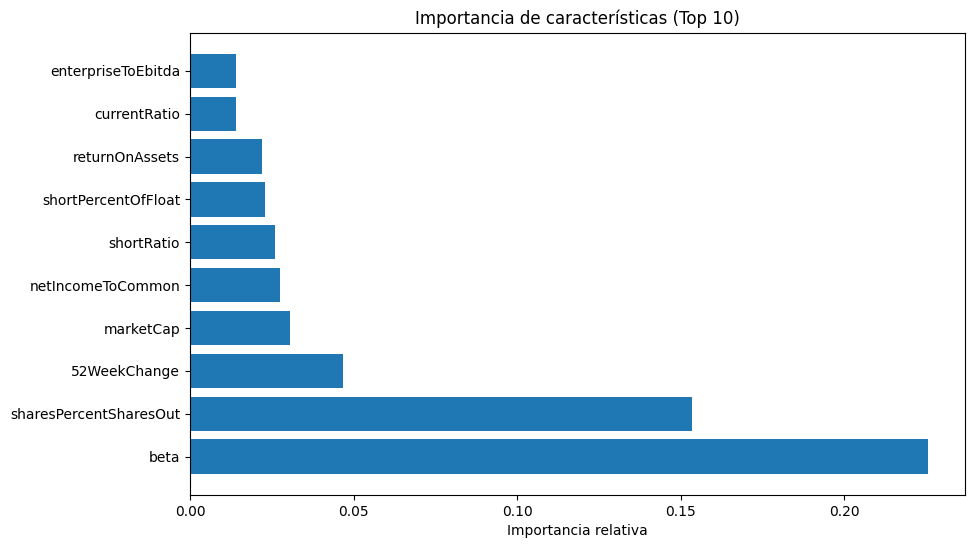

In [268]:
# Definir características (features) y columna objetivo (target)
features = Pen_Merged.drop(columns=['Volatility'])
target = Pen_Merged['Volatility']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Inicializar RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Configurar búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados por la búsqueda en cuadrícula
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Mejor modelo encontrado por la búsqueda en cuadrícula
best_model = grid_search.best_estimator_

# Predecir volatilidad en el conjunto de prueba con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular RMSE del mejor modelo
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE con mejores hiperparámetros: {rmse}")

# Análisis de importancia de características
feature_importance = best_model.feature_importances_
sorted_indices = feature_importance.argsort()[::-1]
top_features = sorted_indices[:10]  # Las 10 características más importantes

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.title('Importancia de características (Top 10)')
plt.barh(range(10), feature_importance[top_features], align='center')
plt.yticks(range(10), X_train.columns[top_features])
plt.xlabel('Importancia relativa')
plt.show()

In [269]:
predictions = best_model.predict(X_test)


In [270]:
# Agregar predicciones como columna al conjunto de prueba
X_test_with_predictions = X_test.copy()  # Copia del conjunto de prueba
X_test_with_predictions['Prediccion_Volatilidad'] = predictions  # Agregar columna de predicciones


In [271]:
nuevo_df = X_test_with_predictions[['Prediccion_Volatilidad']].copy()  # Copia la columna de 'X_test_with_predictions'

nuevo_df = nuevo_df.merge(copia_Seg[['Volatility']], left_index=True, right_index=True)


In [272]:
diferencia_df = pd.DataFrame()
diferencia_df['Diferencia_Volatilidad'] = nuevo_df['Volatility'] - nuevo_df['Prediccion_Volatilidad'] 



In [273]:
diferencia_df.describe()

,Diferencia_Volatilidad
count,101.000000
mean,0.000446
std,0.003438
min,-0.005898
25%,-0.001781
50%,-0.000142
75%,0.001961
max,0.010910
